In [104]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
engine = create_engine('sqlite:///data/wildfires.sqlite')
import plotly.express as px

In [105]:
#Read in CSV
df = pd.read_csv('data/FW_Veg_Rem_Combined.csv')

df.head()

,Unnamed: 0.1,Unnamed: 0,fire_name,fire_size,fire_size_class,stat_cause_descr,latitude,longitude,state,disc_clean_date,...,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
0,0,0,NaN,10.0,C,Missing/Undefined,18.105072,-66.753044,PR,2/11/2007,...,3.250413,78.216590,76.793750,76.381579,78.724370,0.0,0.0,0.0,0.0,0.017923
1,1,1,NaN,3.0,B,Arson,35.038330,-87.610000,TN,12/11/2006,...,2.122320,70.840000,65.858911,55.505882,81.682678,59.8,8.4,0.0,86.8,0.184355
2,2,2,NaN,60.0,C,Arson,34.947800,-88.722500,MS,2/29/2004,...,3.369050,75.531629,75.868613,76.812834,65.063800,168.8,42.2,18.1,124.5,0.194544
3,3,3,WNA 1,1.0,B,Debris Burning,39.641400,-119.308300,NV,6/6/2005,...,0.000000,44.778429,37.140811,35.353846,0.000000,10.4,7.2,0.0,0.0,0.487447
4,4,4,NaN,2.0,B,Miscellaneous,30.700600,-90.591400,LA,9/22/1999,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.214633


In [106]:
#Read datatypes of CSV
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55367 entries, 0 to 55366
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      55367 non-null  int64  
 1   Unnamed: 0        55367 non-null  int64  
 2   fire_name         25913 non-null  object 
 3   fire_size         55367 non-null  float64
 4   fire_size_class   55367 non-null  object 
 5   stat_cause_descr  55367 non-null  object 
 6   latitude          55367 non-null  float64
 7   longitude         55367 non-null  float64
 8   state             55367 non-null  object 
 9   disc_clean_date   55367 non-null  object 
 10  cont_clean_date   27477 non-null  object 
 11  discovery_month   55367 non-null  object 
 12  disc_date_final   28708 non-null  object 
 13  cont_date_final   25632 non-null  object 
 14  putout_time       27477 non-null  object 
 15  disc_date_pre     55367 non-null  object 
 16  disc_pre_year     55367 non-null  int64 

In [107]:
#Drop unneeded columns
df = df.drop(['Unnamed: 0.1','Unnamed: 0','disc_date_pre','disc_pre_year','disc_pre_month','wstation_usaf','dstation_m','wstation_wban','wstation_byear','wstation_eyear','weather_file','putout_time','cont_clean_date','disc_date_final','cont_date_final'], axis=1)

In [108]:
#Eliminate null climate data
df2 = df[df.Temp_pre_30 != -1]

df2 =df2.reset_index(drop=True)
df2.head()

,fire_name,fire_size,fire_size_class,stat_cause_descr,latitude,longitude,state,disc_clean_date,discovery_month,Vegetation,...,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
0,NaN,10.0,C,Missing/Undefined,18.105072,-66.753044,PR,2/11/2007,Feb,12,...,3.250413,78.216590,76.793750,76.381579,78.724370,0.0,0.0,0.0,0.0,0.017923
1,NaN,3.0,B,Arson,35.038330,-87.610000,TN,12/11/2006,Dec,15,...,2.122320,70.840000,65.858911,55.505882,81.682678,59.8,8.4,0.0,86.8,0.184355
2,NaN,60.0,C,Arson,34.947800,-88.722500,MS,2/29/2004,Feb,16,...,3.369050,75.531629,75.868613,76.812834,65.063800,168.8,42.2,18.1,124.5,0.194544
3,WNA 1,1.0,B,Debris Burning,39.641400,-119.308300,NV,6/6/2005,Jun,0,...,0.000000,44.778429,37.140811,35.353846,0.000000,10.4,7.2,0.0,0.0,0.487447
4,NaN,5.2,B,Debris Burning,31.316978,-83.393649,GA,1/10/2009,Jan,12,...,0.000000,79.896679,73.431818,0.000000,0.000000,26.0,0.0,0.0,0.0,0.148904


In [109]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41132 entries, 0 to 41131
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fire_name         20450 non-null  object 
 1   fire_size         41132 non-null  float64
 2   fire_size_class   41132 non-null  object 
 3   stat_cause_descr  41132 non-null  object 
 4   latitude          41132 non-null  float64
 5   longitude         41132 non-null  float64
 6   state             41132 non-null  object 
 7   disc_clean_date   41132 non-null  object 
 8   discovery_month   41132 non-null  object 
 9   Vegetation        41132 non-null  int64  
 10  fire_mag          41132 non-null  float64
 11  Temp_pre_30       41132 non-null  float64
 12  Temp_pre_15       41132 non-null  float64
 13  Temp_pre_7        41132 non-null  float64
 14  Temp_cont         41132 non-null  float64
 15  Wind_pre_30       41132 non-null  float64
 16  Wind_pre_15       41132 non-null  float6

In [110]:
#Only grab named fires
df3 = df2[df2.fire_name.notnull()]

df3

,fire_name,fire_size,fire_size_class,stat_cause_descr,latitude,longitude,state,disc_clean_date,discovery_month,Vegetation,...,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
3,WNA 1,1.0,B,Debris Burning,39.641400,-119.308300,NV,6/6/2005,Jun,0,...,0.000000,44.778429,37.140811,35.353846,0.000000,10.4,7.2,0.0,0.0,0.487447
7,CRAZY,1.0,B,Miscellaneous,48.839400,-99.718500,ND,4/19/2004,Apr,15,...,0.000000,64.606509,55.943038,54.337838,0.000000,12.3,1.8,0.0,0.0,0.291683
11,ROLSTON,1.0,B,Missing/Undefined,33.988609,-103.135277,NM,2/12/1996,Feb,16,...,6.062726,38.712707,45.180055,40.493976,33.537604,10.0,8.0,0.0,0.0,0.330323
14,TELEPHONE FIRE,5.0,B,Debris Burning,33.779575,-96.025915,TX,12/18/2010,Dec,16,...,4.461400,62.304326,60.116883,53.782222,70.162664,0.0,0.0,0.0,0.0,0.262885
17,STO3573155,2.0,B,Debris Burning,35.718900,-92.335000,AR,1/19/2014,Jan,15,...,0.000000,76.091398,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.227270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41127,LILLIAM RANCH,3500.0,F,Missing/Undefined,37.606667,-96.422500,KS,2/12/2015,Feb,0,...,4.559206,62.971774,69.376658,68.118919,64.008028,20.1,18.8,0.0,3.8,0.365622
41128,GUTTERSEN RANCH,11699.0,G,Missing/Undefined,40.394700,-104.564600,CO,9/18/2015,Sep,14,...,2.744039,51.010341,50.264501,48.204861,57.236620,4.6,0.0,0.0,4.8,0.199532
41129,IMPACT,6289.0,G,Missing/Undefined,39.180000,-96.784167,KS,10/15/2015,Oct,0,...,3.804803,65.671410,61.839572,54.625698,55.042092,35.4,8.2,0.0,249.0,0.331501
41130,WILLOW,5702.0,G,Arson,37.262607,-119.511139,CA,7/25/2015,Jul,0,...,2.529158,43.755556,43.755556,44.443975,35.924406,0.0,0.0,0.0,0.0,0.097682


In [111]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20450 entries, 3 to 41131
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fire_name         20450 non-null  object 
 1   fire_size         20450 non-null  float64
 2   fire_size_class   20450 non-null  object 
 3   stat_cause_descr  20450 non-null  object 
 4   latitude          20450 non-null  float64
 5   longitude         20450 non-null  float64
 6   state             20450 non-null  object 
 7   disc_clean_date   20450 non-null  object 
 8   discovery_month   20450 non-null  object 
 9   Vegetation        20450 non-null  int64  
 10  fire_mag          20450 non-null  float64
 11  Temp_pre_30       20450 non-null  float64
 12  Temp_pre_15       20450 non-null  float64
 13  Temp_pre_7        20450 non-null  float64
 14  Temp_cont         20450 non-null  float64
 15  Wind_pre_30       20450 non-null  float64
 16  Wind_pre_15       20450 non-null  float6

In [112]:
#Causes of Wild Fires

wf_cause_df = df3.stat_cause_descr.value_counts()

wf_cause_df = wf_cause_df.to_frame().reset_index()
wf_cause_df = wf_cause_df.rename(columns ={'index':'Causes of Wild Fires', 'stat_cause_descr': '# of Wild fires'})
wf_cause_df


,Causes of Wild Fires,# of Wild fires
0,Lightning,5280
1,Debris Burning,4074
2,Miscellaneous,3477
3,Arson,2359
4,Equipment Use,1799
5,Missing/Undefined,1384
6,Campfire,544
7,Children,467
8,Powerline,352
9,Smoking,351


In [113]:
#Save Causes of WF to csv file

wf_cause_df.to_csv('Causes of WildFires.txt', sep='\t')

In [114]:
#Wild Fires by Month

fireBymonth= df3.discovery_month.value_counts().reset_index()
fireBymonth.columns = ["Month", "Number of Wildfires"]
fireBymonth

,Month,Number of Wildfires
0,Jul,3262
1,Aug,3062
2,Jun,2616
3,Mar,2128
4,Apr,1948
5,May,1589
6,Sep,1373
7,Feb,1232
8,Oct,1056
9,Jan,942


In [115]:
#Pie Chart of Percentage of Wild Fires by Month

df = fireBymonth
fig = px.pie(df, values='Number of Wildfires', names='Month', title='Percentage of Wildfires by Month')
fig.show()


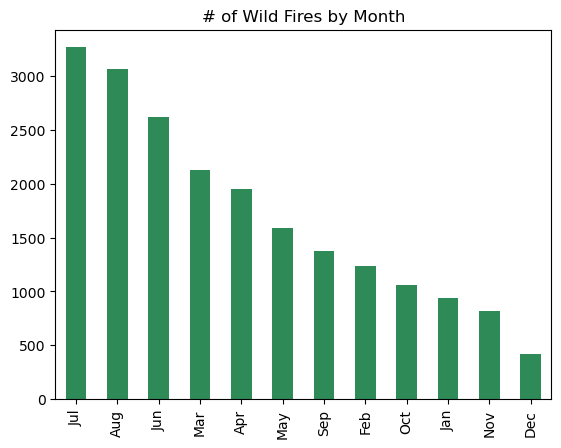

<Figure size 640x480 with 0 Axes>

In [116]:
# Bar Graph of WF by Month
data = df3["discovery_month"].value_counts()
data.plot(kind = "bar", title = "# of Wild Fires by Month", color = "seagreen")
plt.show()
plt.savefig('#ofWfbyMonth.png')

In [117]:
# Fire by State DF 
FiresbyState_df = df3.state.value_counts().reset_index()
FiresbyState_df.columns= ("States", "# of Wildfires")

FiresbyState_df.head(10)

,States,# of Wildfires
0,TX,2966
1,CA,2846
2,GA,1078
3,NC,993
4,ID,908
5,AZ,893
6,NM,875
7,OK,819
8,AK,802
9,FL,740


In [118]:
#Bar Graph of WF by States
df = FiresbyState_df
fig = px.bar(df, y = '# of Wildfires', x = 'States', title = "Number of Wild Fires by States From 1992-2015 in the US", text_auto = '.2s')
fig.update_traces(textfont_size=12, textangle=0, textposition="outside")
fig.show()

In [88]:
#Fire Size Classification

FireSizeClass_df = df3.fire_size_class.value_counts().reset_index()
FireSizeClass_df.columns= ('Fire Class', '# of Wild Fires')
FireSizeClass_df

,Fire Class,# of Wild Fires
0,B,11214
1,C,3488
2,G,3135
3,F,1486
4,D,687
5,E,440


In [90]:
#save cleaned df data
df3.to_csv('cleaned_wildfire.csv')

In [89]:
#Write data to a sqlite db
df3.to_sql('wildfires', con=engine,if_exists='replace',index=False)

20450